# Øving 7: Punkt- og intervallestimering

Dette er en Jupyter-notatbok. Se i Python-ressursene i venstremenyen i emnet i Blackboard hvis du ikke vet helt hvordan du bruker notatboken! 

**Kortversjon:** dobbeltklikk på en celle for å komme i edit-mode, gjør endringene din og kjør koden i en celle med shift-enter (eller velge play-knappen i vertøylinja over). For å kjøre alt i notatboka kan du trykke shift-enter på alle celler (en etter en), eller gå i menyen for hubben (til venstre) og velge Run-"Run all cells".

## Spørsmål 7

**Husk at tallene under ikke er de samme som du har fått!**

En kjemistudent har fått i oppgave å estimere konsentrasjonen av koffein i Coca Cola. Han undersøker 12 prøver, hver med nøyaktig 1.0 dl Coca Cola, og for hver prøve måler han antall mg koffein i prøven.

La $X_i$ betegne målt koffeininnhold, i mg, for prøve nr. $i = 1, 2, \ldots, 12$. 
Anta at $X_1,\ldots, X_12$ er uavhengige og normalfordelte med (ukjent) forventning $\mu$ og standardavvik $\sigma$=0.14. Forventningsverdien $\mu$ representerer her det sanne koffein-innholdet i hver Coca Cola-prøve, mens standardavviket $\sigma$ representerer unøyaktigheten i målemetoden til studenten.

**(a)** De 12 målingene til studenten resulterte i et empirisk gjennomsnitt på $\bar{x}=\frac{1}{12}\sum_{i=1}^{12} x_i=9.2$.
Regn ut et 95% konfidensintervall for $\mu$ basert på dette resultatet. Oppgi grensene i intervallet som desimaltall med tre desimaler, for eksempel 0.053 og 0.125.

Det finnes ikke en egen konfidensintervallfunksjon i Python, så vi må bruke formelen vi har lært fra undervisningen - det vi skal lage heter $Z$-intervall og formelen finnes som Regel 6.9 i Løvås:

For et utvalg uavhengige og normalfordelte variable med kjent standardavvik $\sigma$ er et $(1-\alpha)\cdot100$ %-konfidensintervall gitt ved 
$\left[\bar x - z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}},\bar x + z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\right]$
Her er $z_{\frac{\alpha}{2}}$ kritisk verdi i standard normalfordeling (tallet i standardnormalfordelingen der det er sannsynlighet $\frac{\alpha}{2}$ for være større enn).

In [1]:
import numpy as np
from scipy import stats
from math import sqrt

xbar=9.2
sigma=0.14
alpha=0.05 
n=12

alphahalve=alpha/2
zalphahalve=stats.norm.ppf(1-alphahalve) # sannsynlighet alpha/2 til høyre har 1-alpha/2 til venstre
print(zalphahalve)

1.959963984540054


Merk at ppf-funksjonen er inversen av kumulativ fordeling, altså er $P(Z \leq \text{ppf}(\frac{α}{2})) = \frac{α}{2}$. Vi ønsker derimot verdien $z_{\frac{α}{2}}$, som oppfyller $P(Z \geq z_{\frac{α}{2}}) = \frac{α}{2}$. Dette blir dermed $\text{ppf}(1 - \frac{α}{2})$.

Da har vi

* xbar
* sigma
* n
* zalphahalve

og det er bare å sette inn i formelen og regne ut!

In [ ]:
nedre=xbar- #fyll ut resten selv
print(nedre)
ovre=xbar+ # fyll ut resten selv
print(ovre)


**(b)** Hvor mange prøver måtte studenten minst ha undersøkt for at bredden på et 95% konfidensintervall ikke skal være større enn 0.12? 
Prøv deg frem med ulike $n$ i Python, og oppgi svaret som et positivt heltall.

Bredden til et konfidensintervall kan vi regne som øvre grense minus nedre grense. I a) så vi formelen for øvre og nedre grense, og bredden til intervallet blir da
$$B(n)=(\bar x + z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}})-(\bar x - z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}})=2 z_{\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

Vi har fått beskjed om å la $\sigma$ og $z_{\frac{\alpha}{2}}$ være faste størrelser (som vi allerede har skrevet inn og regnet ut over) og vi skal se på bredden som en funksjon av antallet $n$. Selve bredden $B(n)$ har vi også fått oppgitt skal være 0.12, så bredden er kjent. 

Den åpenbare løsningen (som ikke krever prøving og feiling) er da å løse denne ligningen som nå kun har en ukjent størrelse, og den ukjente størrelsen er $n$. Hvis du vil gjøre det så er det helt fint!

Men, vi er blitt bedt om å heller utforske hvordan denne funksjonen ser ut som en funksjon av n. Vi ser allerede at $\sqrt{n}$ er i nevneren.

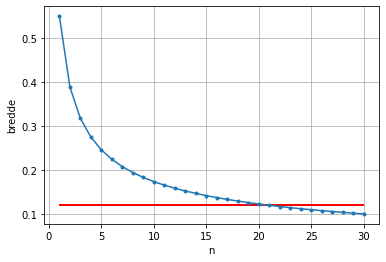

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sigma=0.14
alpha=0.05 
alphahalve=alpha/2
zalphahalve=stats.norm.ppf(1-alphahalve) 

def breddefunc(n):
  return(2*zalphahalve*sigma/np.sqrt(n))

nverdier=np.arange(1,31)

fig, ax = plt.subplots()
ax.plot(nverdier, breddefunc(nverdier), '.-')
ax.set_xlabel('n')
ax.set_ylabel('bredde')
ax.hlines(y=0.12, xmin=1, xmax=30, linewidth=2, color='r')
ax.grid()
plt.show()

Tja, er det 20 eller 21 som gir bredde på 0.12? Undersøker vi litt nærmere ser vi at vi må velge $n=21$ for å være sikret bredde som ikke overskrider 0.12.

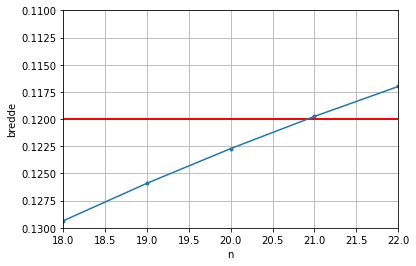

In [3]:
fig, ax = plt.subplots()
ax.plot(nverdier, breddefunc(nverdier), '.-')
ax.set_xlim(18,22)
ax.set_ylim(0.13,0.11)
ax.set_xlabel('n')
ax.set_ylabel('bredde')
ax.hlines(y=0.12, xmin=18, xmax=22, linewidth=2, color='r')
ax.grid()
plt.show()